Using the predator prey system in the previous lecture, test the effect of changing the timestep on the numerical solution. 
You can use the same notebook if you like.

If you make the timestep 10 times longer (bigger steps), does the solution using forward euler method change, and if so how? 

Is the difference easier to see in the timeseries or phase space plots? What about the RK4? 

Repeat the exercise making the timestep 10 times smaller.

In [30]:
# importrequired libraries
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [31]:
#define the time stepping scheme - euler forward, as used in earlier lessons
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [32]:
# define the function that represents the Lotka-Volterra equations
def f(u):
    """Returns the rate of change of species numbers.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return numpy.array([x*(alpha - beta*y), -y*(gamma - delta*x)])

In [33]:
# set time-increment and discretize the time
T  = 15.0                        # final time (15*10)
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps
x0 = 10.
y0 = 2.
t0 = 0.

# set initial conditions
u_euler = numpy.empty((N, 2))

# initialize the array containing the solution for each time-step
u_euler[0] = numpy.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

Text(0.5, 1.0, 'predator prey model')

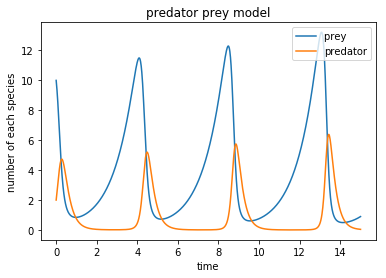

In [34]:
time = numpy.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, label = 'prey ')
plt.plot(time, y_euler, label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")
#regular time series plot

Text(0.5, 1.0, 'predator prey model')

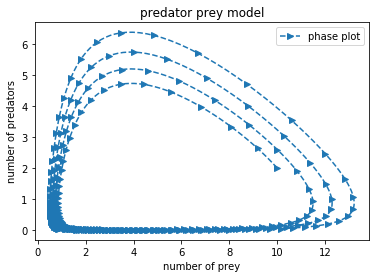

In [35]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")
#regular phase plot

Text(0.5, 1.0, 'predator prey model')

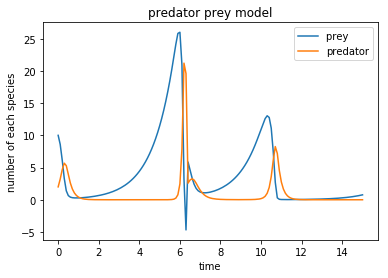

In [36]:
# set time-increment and discretize the time
T  = 15.0                        # final time 
dt = 0.01*10                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps
x0 = 10.
y0 = 2.
t0 = 0.

# set initial conditions
u_euler = numpy.empty((N, 2))

# initialize the array containing the solution for each time-step
u_euler[0] = numpy.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
time = numpy.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, label = 'prey ')
plt.plot(time, y_euler, label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")
#times 10 time series plot

Text(0.5, 1.0, 'predator prey model')

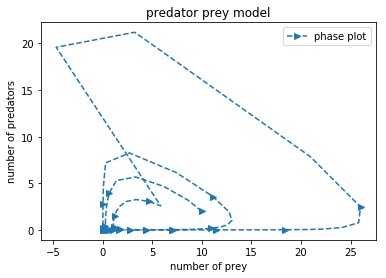

In [37]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")
#times 10 phase plot

Text(0.5, 1.0, 'predator prey model')

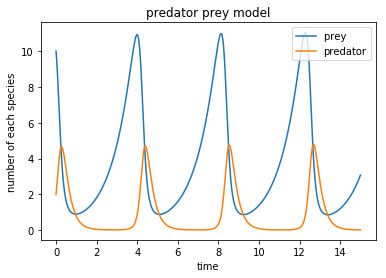

In [38]:
# set time-increment and discretize the time
T  = 15.0                        # final time 
dt = 0.01/10                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps
x0 = 10.
y0 = 2.
t0 = 0.

# set initial conditions
u_euler = numpy.empty((N, 2))

# initialize the array containing the solution for each time-step
u_euler[0] = numpy.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
time = numpy.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, label = 'prey ')
plt.plot(time, y_euler, label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")
#divided by 10 time series

Text(0.5, 1.0, 'predator prey model')

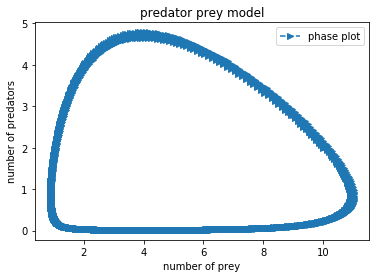

In [39]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")
#divided by 10 phase

Warm up: The smaller the time increment, the more accurate to the equation it is. A smaller time increment in an euler method gets closer to the RK4 Method.

Text(0, 0.5, 'number of each species')

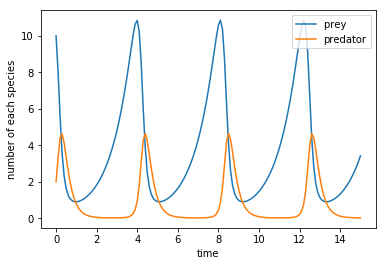

In [45]:
def RK4(u,f,dt):
    # Runge Kutta 4th order method
    """Returns the solution at the next time-step using Runge Kutta fourth order (RK4) method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    #calculate slopes
    k1 = f(u)
    u1 = u + (dt/2.)*k1
    k2 = f(u1)
    u2 = u + (dt/2.)*k2
    k3 = f(u2)
    u3 = u + dt*k3
    k4 = f(u3)
    return u + (dt/6.)*(k1 + 2.*k2 + 2.*k3 + k4)
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01*10                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps
x0 = 10.
y0 = 2.
t0 = 0.

# set initial conditions
u_euler = numpy.empty((N, 2))

# initialize the array containing the solution for each time-step
u_euler[0] = numpy.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    
    u_euler[n+1] = RK4(u_euler[n], f, dt)
time = numpy.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, label = 'prey ')
plt.plot(time, y_euler, label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")


Text(0.5, 1.0, 'predator prey model')

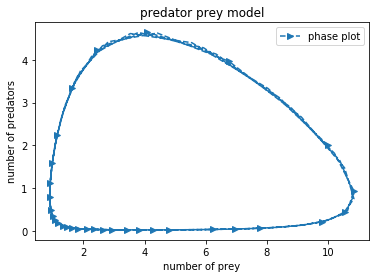

In [46]:
#title
plt.title("predator prey model")
#Exaggerated alpha plot..is prey reproducing so rapidly that it allows predators to rise 
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')


#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [47]:
#Doesn't change that much when compared to Euler's method.